# Activity 1: IPython i Jupyter

Zademonstrujmy powszechny rozwój języka Python w IPython i Jupyter. Zaimportujemy NumPy,
zdefiniuj funkcję i iteruj wyniki.

1. Aby zaimportować NumPy, użyj:

In [9]:
import numpy as np

2. Utwórz funkcję kwadratPlus(x,c), która obliczy wartość: y=x^2+c

In [10]:
def squarePlus(x,c):
    y = x^2 + c
    return y

3. Uruchom swój kod w IPythonie i Jupyterze

In [11]:
squarePlus(2,1)

1

# Activity 2: Praca z problemami z danymi

Przed rozpoczęciem analizy musimy sprawdzić, czy nie występują problemy z danymi, a kiedy je znajdziemy (co jest bardzo powszechne!), musimy rozwiązać problemy, przekształcając ramkę DataFrame. Można to zrobić w jeden sposób oznacza to na przykład zastosowanie funkcji do kolumny lub całej ramki DataFrame. Jest to powszechne niektóre liczby w ramce danych po jej odczytaniu nie są poprawnie konwertowane na liczby zmiennoprzecinkowe liczby. Rozwiążmy ten problem, stosując funkcje:

1. Zaimportuj Pandas i bibliotekę numpy.

In [12]:
import pandas as pd
import numpy as np

2. Przeczytaj zbiór danych RadNet udostępniony przez Agencję Ochrony Środowiska Stanów Zjednoczonych.

In [13]:
df = pd.read_csv('RadNet_Laboratory_Analysis.csv')
df.head()

,State,Location,Date Posted,Date Collected,Sample Type,Unit,Ba-140,Co-60,Cs-134,Cs-136,Cs-137,I-131,I-132,I-133,Te-129,Te-129m,Te-132
0,ID,Boise,03/30/2011,03/23/2011,Air Filter,pCi/m3,Non-detect,Non-detect,Non-detect,NaN,Non-detect,0.088,Non-detect,Non-detect,NaN,NaN,Non-detect
1,ID,Boise,03/30/2011,03/23/2011,Air Filter,pCi/m3,Non-detect,Non-detect,Non-detect,NaN,Non-detect,0.055,Non-detect,Non-detect,NaN,NaN,Non-detect
2,AK,Juneau,03/30/2011,03/23/2011,Air Filter,pCi/m3,Non-detect,Non-detect,0.0057,NaN,0.0074,0.067,Non-detect,Non-detect,NaN,NaN,0.0043
3,AK,Nome,03/30/2011,03/22/2011,Air Filter,pCi/m3,Non-detect,Non-detect,Non-detect,NaN,Non-detect,0.096,Non-detect,Non-detect,NaN,NaN,Non-detect
4,AK,Nome,03/30/2011,03/23/2011,Air Filter,pCi/m3,Non-detect,Non-detect,Non-detect,NaN,Non-detect,0.22,Non-detect,Non-detect,NaN,NaN,Non-detect


3. Utwórz listę z kolumnami numerycznymi dla radionuklidów w zbiorze danych RadNet.

In [14]:
df.dtypes

State             object
Location          object
Date Posted       object
Date Collected    object
Sample Type       object
Unit              object
Ba-140            object
Co-60             object
Cs-134            object
Cs-136            object
Cs-137            object
I-131             object
I-132             object
I-133             object
Te-129            object
Te-129m           object
Te-132            object
dtype: object

In [15]:
columns = df.columns
id_cols = ['State', 'Location', 'Date Posted', 'Date Collected', 'Sample Type', 'Unit']
columns = list(set(columns)-set(id_cols))
columns

['Te-132',
 'Co-60',
 'Cs-134',
 'Cs-136',
 'I-133',
 'Ba-140',
 'Te-129m',
 'Cs-137',
 'I-131',
 'I-132',
 'Te-129']

4. Użyj metody Apply w jednej kolumnie z funkcją lambda, która porównuje wartość Brak wykrycia
strunowy

In [16]:
# lambda
func = lambda x: x**2 if x>10 else x
func(29)

841

In [17]:
df['Cs-134'] = df['Cs-134'].apply(lambda x: np.nan if ((x=='Non-detect') | (x=='ND')) else x)
df['Cs-134'].head()

0       NaN
1       NaN
2    0.0057
3       NaN
4       NaN
Name: Cs-134, dtype: object

5. Użyj metody Applymap, aby zamienić wartości tekstowe „Non-detect” na .np.nan we wszystkich numerach
kolumn na raz, zrób to samo z wartością „ND”.

In [18]:
df.loc[:,columns] = df.loc[:,columns].applymap(lambda x: np.nan if ((x=='Non-detect') | (x=='ND')) else x)
df.loc[:,columns].head()

/tmp/ipykernel_1722/1917651076.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df.loc[:,columns] = df.loc[:,columns].applymap(lambda x: np.nan if ((x=='Non-detect') | (x=='ND')) else x)


,Te-132,Co-60,Cs-134,Cs-136,I-133,Ba-140,Te-129m,Cs-137,I-131,I-132,Te-129
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.088,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.055,NaN,NaN
2,0.0043,NaN,0.0057,NaN,NaN,NaN,NaN,0.0074,0.067,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.096,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.22,NaN,NaN


6. Użyj tej samej metody Applymap, aby usunąć wszystkie spacje (od początku i końca) we wszystkich pozostałych
kolumny (nienumeryczne). Użyj metody strip(), aby usunąć spacje.

In [19]:
df.loc[:,id_cols] = df.loc[:,id_cols].applymap(lambda x: x.strip())
df.loc[:,id_cols].head()

/tmp/ipykernel_1722/2596169239.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df.loc[:,id_cols] = df.loc[:,id_cols].applymap(lambda x: x.strip())


,State,Location,Date Posted,Date Collected,Sample Type,Unit
0,ID,Boise,03/30/2011,03/23/2011,Air Filter,pCi/m3
1,ID,Boise,03/30/2011,03/23/2011,Air Filter,pCi/m3
2,AK,Juneau,03/30/2011,03/23/2011,Air Filter,pCi/m3
3,AK,Nome,03/30/2011,03/22/2011,Air Filter,pCi/m3
4,AK,Nome,03/30/2011,03/23/2011,Air Filter,pCi/m3


Dodatkowo:
7. Zmień typy danych kolumn za pomocą metod (użyj df.dtypes() do sprawdzenia typów danych):

pd.to_datetime()
pd.to_numeric()

In [20]:
df['Date Posted'] = pd.to_datetime(df['Date Posted'])
df['Date Collected'] = pd.to_datetime(df['Date Collected'])
for col in columns:
    df[col] = pd.to_numeric(df[col])
df.dtypes

State                     object
Location                  object
Date Posted       datetime64[ns]
Date Collected    datetime64[ns]
Sample Type               object
Unit                      object
Ba-140                   float64
Co-60                    float64
Cs-134                   float64
Cs-136                   float64
Cs-137                   float64
I-131                    float64
I-132                    float64
I-133                    float64
Te-129                   float64
Te-129m                  float64
Te-132                   float64
dtype: object

In [21]:
df

,State,Location,Date Posted,Date Collected,Sample Type,Unit,Ba-140,Co-60,Cs-134,Cs-136,Cs-137,I-131,I-132,I-133,Te-129,Te-129m,Te-132
0,ID,Boise,2011-03-30,2011-03-23,Air Filter,pCi/m3,NaN,NaN,NaN,NaN,NaN,0.088,NaN,NaN,NaN,NaN,NaN
1,ID,Boise,2011-03-30,2011-03-23,Air Filter,pCi/m3,NaN,NaN,NaN,NaN,NaN,0.055,NaN,NaN,NaN,NaN,NaN
2,AK,Juneau,2011-03-30,2011-03-23,Air Filter,pCi/m3,NaN,NaN,0.0057,NaN,0.0074,0.067,NaN,NaN,NaN,NaN,0.0043
3,AK,Nome,2011-03-30,2011-03-22,Air Filter,pCi/m3,NaN,NaN,NaN,NaN,NaN,0.096,NaN,NaN,NaN,NaN,NaN
4,AK,Nome,2011-03-30,2011-03-23,Air Filter,pCi/m3,NaN,NaN,NaN,NaN,NaN,0.220,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
601,CA,Richmond,2011-04-25,2011-04-14,Precipitation,pCi/l,NaN,NaN,8.9000,NaN,7.9000,5.900,NaN,NaN,NaN,NaN,NaN
602,CA,Richmond,2011-05-24,2011-04-28,Precipitation,pCi/l,NaN,NaN,6.6000,NaN,5.8000,NaN,NaN,NaN,NaN,NaN,NaN
603,UT,Salt Lake City,2011-05-24,2011-04-14,Precipitation,pCi/l,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
604,UT,Salt Lake City,2011-05-24,2011-04-28,Precipitation,pCi/l,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Ćwiczenie 3. Wykreślanie danych za pomocą Pandas

1. Skorzystaj z RadNet DataFrame, z którym pracowaliśmy.

2. Jak widzieliśmy wcześniej, napraw wszystkie problemy z typami danych.

3. Utwórz wykres z filtrem według lokalizacji, wybierając miasto San Bernardino i jedno radionuklid, z osią x ustawioną na datę i osią y z radionuklidem I-131.

<Axes: xlabel='Date Collected'>

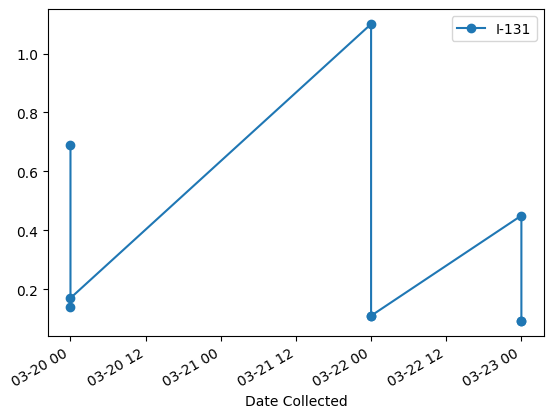

In [22]:
df.loc[df.Location == 'San Bernardino'].plot(x='Date Collected', y='I-131', marker='o')

4. Utwórz wykres za pomocą pliku matplotlib.plt - w stylu Matlab - z koncentracją dwóch powiązanych radionuklidy I-131 i I-132.

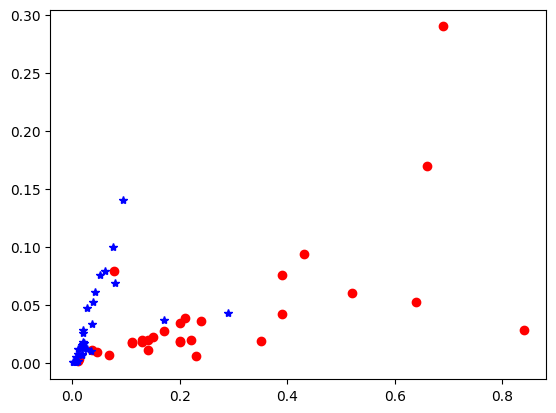

In [23]:
import matplotlib.pyplot as plt

plt.plot(df['I-131'], df['I-132'], 'ro')
plt.plot(df['I-132'],df['Cs-134'],'b*')

5. Utwórz wykres punktowy ze stężeniami dwóch powiązanych radionuklidów, I-131 i I-132:

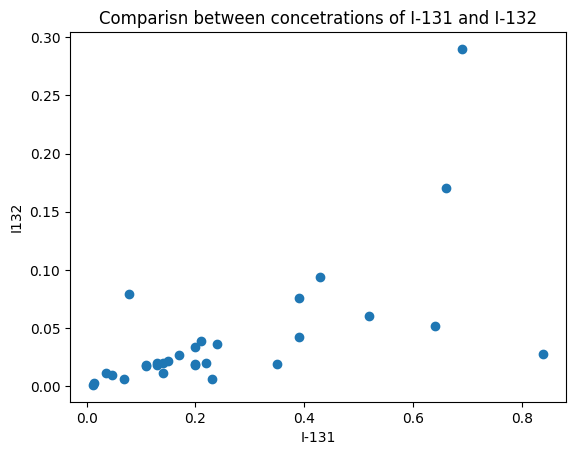

In [24]:
ig, ax = plt.subplots()
ax.scatter(x=df['I-131'], y=df['I-132'])
_ = ax.set(
    xlabel='I-131',
    ylabel='I132',
    title='Comparisn between concetrations of I-131 and I-132'
)

# Ćwiczenie 4: Wykresy liniowe z obiektowym API i Pandas Ramki danych

W tym ćwiczeniu najpierw utworzymy wykres liniowy szeregów czasowych na podstawie zbioru danych pliku „cars.data”. Przykład kreślenia przy użyciu pand i obiektowego API. Ten rodzaj wykresu jest powszechny w
analizy i pomaga odpowiedzieć na pytania takie jak „czy średnia moc wzrasta, czy maleje
z czasem?"

Teraz postępuj zgodnie z poniższymi procedurami, aby wykreślić wykres średniej mocy rocznej za pomocą Pandas i podczas korzystania z obiektowego API.

1. Zaimportuj wymagane biblioteki do notatnika Jupyter i odczytaj zbiór danych z pliku cars.data
repozytorium zbiorów danych: matplotlib, numpy, pandas. Załaduj dane do ramki danych pandy z pliku: samochody.data

In [25]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

url = 'cars_headers.csv'
df = pd.read_csv(url)

In [26]:
df.head()

,Unnamed: 0,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


2. Podaj nazwy kolumn, aby uprościć zbiór danych, jak pokazano poniżej:

In [27]:
column_names = ['mpg', 'cylinders', 'displacement [cu]', 'horsepower', 'weight', 'acceleration', 'year', 'origin', 'name']

3. Teraz ponownie przeczytaj nowy zbiór danych z nazwami kolumn i wyświetl go.

In [28]:
df = pd.read_csv(url)
df.head()

,Unnamed: 0,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [29]:
df.dtypes()

TypeError: 'Series' object is not callable

In [ ]:
'12.0'.isdigit()

False

In [ ]:
'12.0'.replace('.','').isdigit()

True

In [ ]:
df.horsepower.apply(lambda x:x.replace('.','').isdigit()==False)

In [ ]:
nondigits = df.horsepower.apply(lambda x:x.replace('.','').isdigit()==False)
df[nondigits]

4. Istnieją pewne wartości mocy ustawione na „?”. Zmień je na NaN.

In [ ]:
df.loc[df.horsepower=='?','horsepower'] = np.nan

In [ ]:
df.loc[df.horsepower=='?']

,Unnamed: 0,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name


5. Konwertuj wartości mocy na numeryczne

In [ ]:
df['horsepower'] = pd.to_numeric(df['horsepower'])

6. Spójrz na wartość roku. jest podany częściowo bez tysięcy i setek. Zamień je na cały rok np.: 70 do 1970, 82 do 1982 itd. Utwórz nową kolumnę „full_date” i wypełnij ją na podstawie wartości kolumny „rok”:

In [ ]:
df['full_date'] = pd.to_datetime(df.year, format='%y')

Wypełnij kolumnę „rok” rokiem od pełnej daty utworzonej wcześniej:

In [ ]:
df['year'] = df['full_date'].dt.year

7. Sprawdź swoje zmiany.

In [ ]:
df

,Unnamed: 0,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,full_date
0,0,18.0,8,307.0,130.0,3504.0,12.0,1970,1,chevrolet chevelle malibu,1970-01-01
1,1,15.0,8,350.0,165.0,3693.0,11.5,1970,1,buick skylark 320,1970-01-01
2,2,18.0,8,318.0,150.0,3436.0,11.0,1970,1,plymouth satellite,1970-01-01
3,3,16.0,8,304.0,150.0,3433.0,12.0,1970,1,amc rebel sst,1970-01-01
4,4,17.0,8,302.0,140.0,3449.0,10.5,1970,1,ford torino,1970-01-01
...,...,...,...,...,...,...,...,...,...,...,...
393,393,27.0,4,140.0,86.0,2790.0,15.6,1982,1,ford mustang gl,1982-01-01
394,394,44.0,4,97.0,52.0,2130.0,24.6,1982,2,vw pickup,1982-01-01
395,395,32.0,4,135.0,84.0,2295.0,11.6,1982,1,dodge rampage,1982-01-01
396,396,28.0,4,120.0,79.0,2625.0,18.6,1982,1,ford ranger,1982-01-01


8. Teraz zbiór danych jest gotowy do tworzenia wykresów. Wykreśl średnią moc roczną, korzystając z poniższego wzoru Komendy:

<Axes: xlabel='year'>

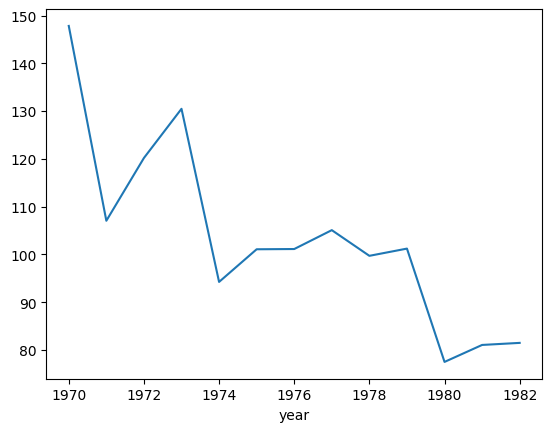

In [ ]:
df.groupby('year')['horsepower'].mean().plot()

9. Spróbuj wykreślić średnią moc, przyspieszenie i mpg rocznie. Pokaż to na jednej działce. Skorzystaj z groupby. To powinna być tylko jedna linia kodu

<Axes: xlabel='year'>

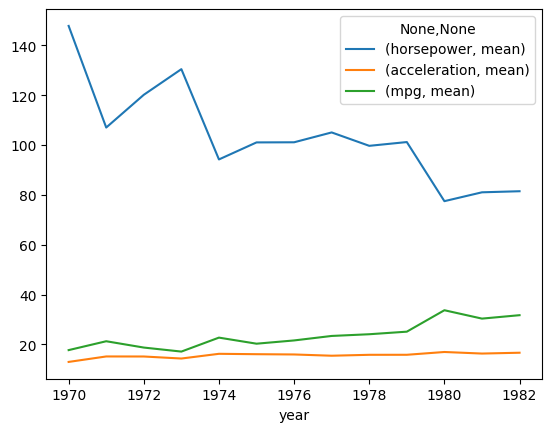

In [ ]:
df.groupby('year').agg({'horsepower':['mean'], 'acceleration':['mean'], 'mpg':['mean']}).plot()

In [ ]:
df.groupby('year').agg({'horsepower':['std'], 'acceleration':['std'], 'mpg':['std']}).head(50)

,horsepower,acceleration,mpg
,std,std,std
year,,,
1970,53.734844,3.330982,5.339231
1971,38.566109,2.666171,6.591942
1972,41.121368,2.850032,5.435529
1973,46.412304,2.754222,4.700245
1974,29.686775,1.688532,6.420010
1975,26.577062,2.471737,4.940566
1976,32.430592,2.801419,5.889297
1977,36.095479,2.273391,6.675862


Scatter plots

Wykresy punktowe pomagają nam zrozumieć korelację między dwiema zmiennymi. Umożliwiają dystrybucję
punktów, które trzeba zobaczyć. Przykłady tworzenia wykresów punktowych przy użyciu różnych bibliotek:

1. Matplotlib

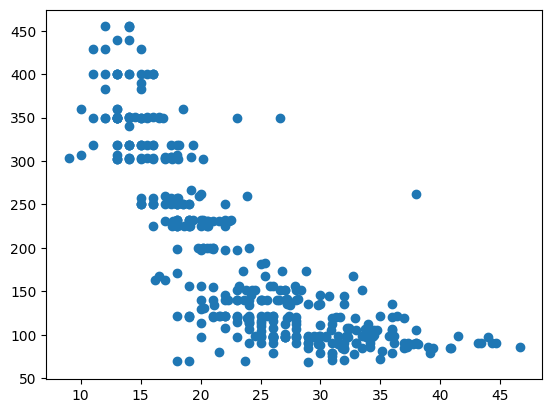

In [ ]:
fig, ax = plt.subplots()
ax.scatter(x = df['mpg'], y=df['displacement'])

2. Ramka danych Pandas

<Axes: xlabel='mpg', ylabel='displacement'>

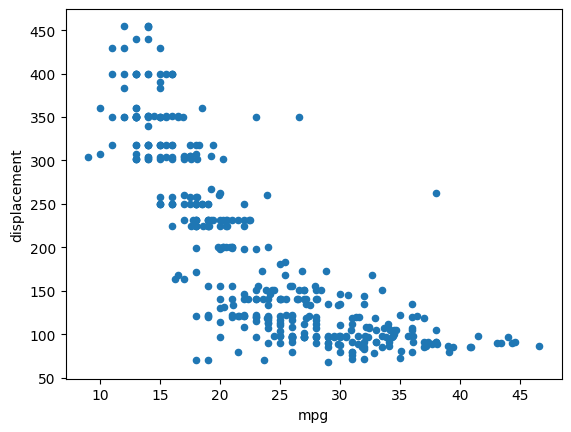

In [ ]:
fig, ax = plt.subplots()
df.plot(kind='scatter', x='mpg', y='displacement', ax=ax)

2. Seaborn

<Axes: xlabel='mpg', ylabel='displacement'>

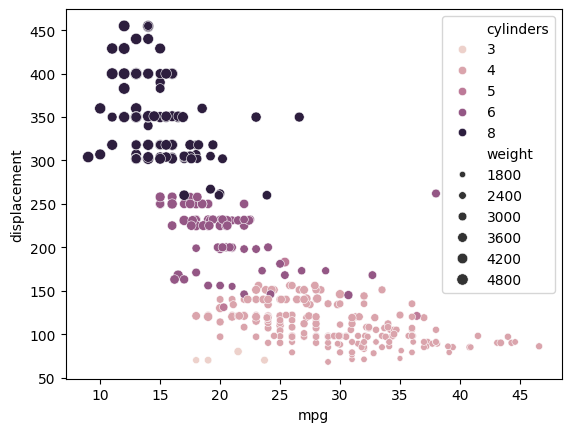

In [ ]:
import seaborn as sns
sns.scatterplot(data=df, x='mpg', y='displacement', hue='cylinders', size='weight')

# Ćwiczenie 5: Zrozumienie relacji zmiennych za pomocą Scatter Plots

Aby kontynuować analizę danych i dowiedzieć się, jak wykreślać dane, przyjrzyjmy się sytuacji, w której występuje wykres punktowy może pomóc. Na przykład użyjmy wykresu punktowego, aby odpowiedzieć na następujące pytanie:

Czy istnieje związek pomiędzy mocą a masą?

Aby odpowiedzieć na to pytanie, musimy utworzyć wykres punktowy z danymi z pliku cars.data.
1. Skorzystaj z już przetworzonego zbioru danych samochodów.data.
2. Utwórz wykresy punktowe przy użyciu: Matplotlib, Pandas i Seaborn.

Kiedy już to zrobimy: możemy zidentyfikować w przybliżeniu liniową zależność pomiędzy mocą a masą, za pomocą niektóre wartości odstające o większej mocy i niższej masie. To jest rodzaj wykresu, który by pomógł analityk interpretuje zachowanie danych.

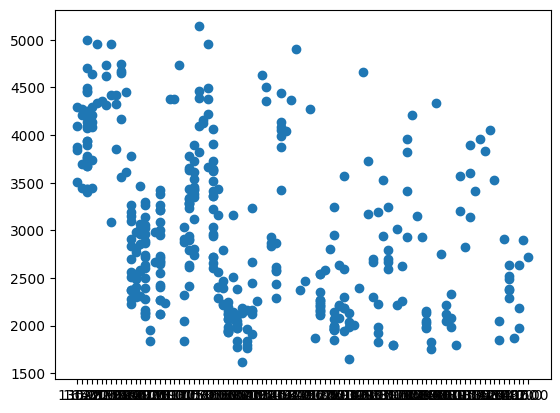

In [ ]:
%matplotlib inline
fig, ax = plt.subplots()
ax.scatter(x = df['horsepower'], y=df['weight'])

In [ ]:
df[['horsepower','weight']].corr()

# Ćwiczenie 6: Eksportowanie wykresu do pliku na dysku

Dobrym sposobem na umożliwienie udostępniania wyników w różnych mediach jest zapisanie naszej pracy do pliku. Pomaga to również, jeśli chcemy zachować je do wykorzystania w przyszłości. Stwórzmy wykres i zapiszmy go na dysk.

1. Utwórz dowolny wykres za pomocą obiektowego API Matplotlib. Na przykład włączony histogram
waga.

<Axes: ylabel='Frequency'>

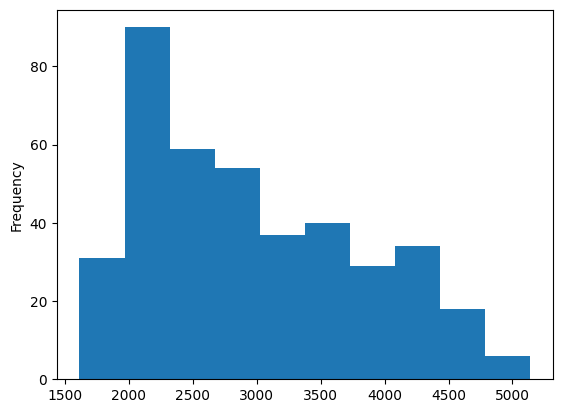

In [32]:
%matplotlib inline
import matplotlib.pyplot
fig, ax = plt.subplots()
df.weight.plot(kind='hist', ax=ax)

2. Wyeksportuj to do pliku PNG za pomocą funkcji savefig:

In [31]:
fig.savefig('weight_hist.png')

# Ćwiczenie 7: Kompletny projekt

Jako analityk chcemy zrozumieć, czy średnia liczba kilometrów rocznie wzrosła, czy nie, i my
chcesz pogrupować według liczby cylindrów. Na przykład, jakie jest zachowanie, jeśli chodzi o zużycie paliwa, a samochód z trzema cylindrami, z biegiem czasu? Czy jest wyższa czy niższa od auta czterocylindrowego? Utwórz wykres podobny do poniższego i zapisz go w pliku.

In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [4]:
url = 'cars_headers.csv'
df = pd.read_csv(url)

In [5]:
df_g = df.groupby(['year', 'cylinders'], as_index=False).horsepower.mean()
fig, axes = plt.subplots()
df_g = df_g.set_index(df_g.year)
df_g.groupby('cylinders').horsepower.plot(axes=axes, figsize=(10,8))

TypeError: agg function failed [how->mean,dtype->object]

# Aktywność: Konwersja danych

In [ ]:
Konwertuj dane z pliku cars.data użytego na poprzedniej lekcji z formatu CSV na format Spark JSON.
Możesz użyć pand w tym procesie. Zwróć uwagę na różnice między plikami JSON pand i iskrowymi plikami JSON.

In [ ]:
import pandas as pd
column_names = ['mpg', 'cylinders', 'displacement [cu]', 'horsepower', 'weight', 'acceleration', 'year', 'origin', 'name']
dfp = pd.read_csv('cars.data', names=column_names, delim_whitespaces=True)
dfp.head()
dfp.to_scv('cars_headers.csv')
dfs = spark.read.csv('cars_headers.csv', header=True)
dfs.show()
dfs.write.json('carsSPARK23.json')

# Ćwiczenie 9: Pierwsze kroki z ramkami danych Spark

W tym ćwiczeniu wykorzystamy koncepcje poznane w poprzednich sekcjach i utworzymy Spark
DataFrame przy użyciu wszystkich trzech metod. Obliczymy także statystyki DataFrame i na koniec napiszemy
te same dane do pliku CSV. Do tego ćwiczenia możesz użyć dowolnego zbioru danych typu open source.

1. Utwórz przykładową ramkę DataFrame, ręcznie określając schemat.

In [ ]:
import pyspark
sc = pyspark.SparkContext()
from pyspark.sql import SQLContext
sqlc = SQLContext(sc)

In [ ]:
from pyspark.sql import *
na_schema = Row('Name', 'Subject', 'Marks')
row1 = na_schema('Ankit', 'Science', 95)
row2 = na_schema('Ankit', 'Maths', 86)
row3 = na_schema('Preity', 'Maths', 92)
na_list = [row1, row2, row3]
df_na = sqlc.createDataFrame(na_list)
type(df_na)

In [ ]:
df_na.show()

2. Utwórz przykładową ramkę danych z istniejącego RDD.

In [ ]:
data = [()]


3. Utwórz przykładową ramkę DataFrame, wczytując dane z pliku CSV.
4. Wydrukuj pierwsze siedem wierszy przykładowej ramki DataFrame odczytanej w kroku 3.
5. Wydrukuj schemat przykładowej ramki DataFrame odczytanej w kroku 3.
6. Wydrukuj liczbę wierszy i kolumn w przykładowej ramce DataFrame.
7. Wydrukuj statystyki podsumowujące ramkę DataFrame i dowolne 2 pojedyncze kolumny liczbowe.
8. Zapisz pierwsze 7 wierszy przykładowej ramki DataFrame do pliku CSV, korzystając z obu wymienionych metod w ćwiczeniach.

# Ćwiczenie 50: Podzbiór ramki danych

1. Utwórz podzbiór rekordów, w których wartość salda mieści się w przedziale od 0 do 2000.

In [ ]:
subset_df = df.filter((df['balance'] >= 0) & (df['balance'] <= 2000))
subset_df.show()